# Exercise:

First: explore the data
1. Review the unstructured csv files and answer the following questions with code that supports your conclusions:
2. Are there any data quality issues present?
3. Are there any fields that are challenging to understand?
* We recommend using SQL or python and data visualization to examine the data.

In [1]:
#import packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'
%load_ext autoreload
%autoreload 2
%matplotlib inline
    
from datetime import date, datetime
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql
import os
pd.set_option('display.max_columns', None)


## 1. Import data with functions, show ER diagram

In [2]:
# import function 
def import_csv_files(directory, files, names):
    # since we have 3 csvs, we want to loop through the list of files and names
    for file, name in zip(files, names):
        
        # Combine the directory and file name to get the full path
        file_path = os.path.join(directory, file)
        
        # read the CSV file and assign df names 
        try:
            globals()[name] = pd.read_csv(file_path)  
            print(f"Successfully imported {file} as {name}")
        except Exception as e:
            print(f"Error importing {file}: {e}")
            
# define Path to the directory, import file names, and df names 
directory = 'C:/Users/szhang/Downloads/exercise/'  # 
files = ['PRODUCTS_TAKEHOME.csv' , 'TRANSACTION_TAKEHOME.csv', 'USER_TAKEHOME.csv']  
names = ['product', 'transaction', 'user']

# import data
import_csv_files(directory, files, names)

Successfully imported PRODUCTS_TAKEHOME.csv as product
Successfully imported TRANSACTION_TAKEHOME.csv as transaction
Successfully imported USER_TAKEHOME.csv as user


In [3]:
# take a look at the dataframes
product.head(2)
transaction.head(2)
user.head(2)

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female


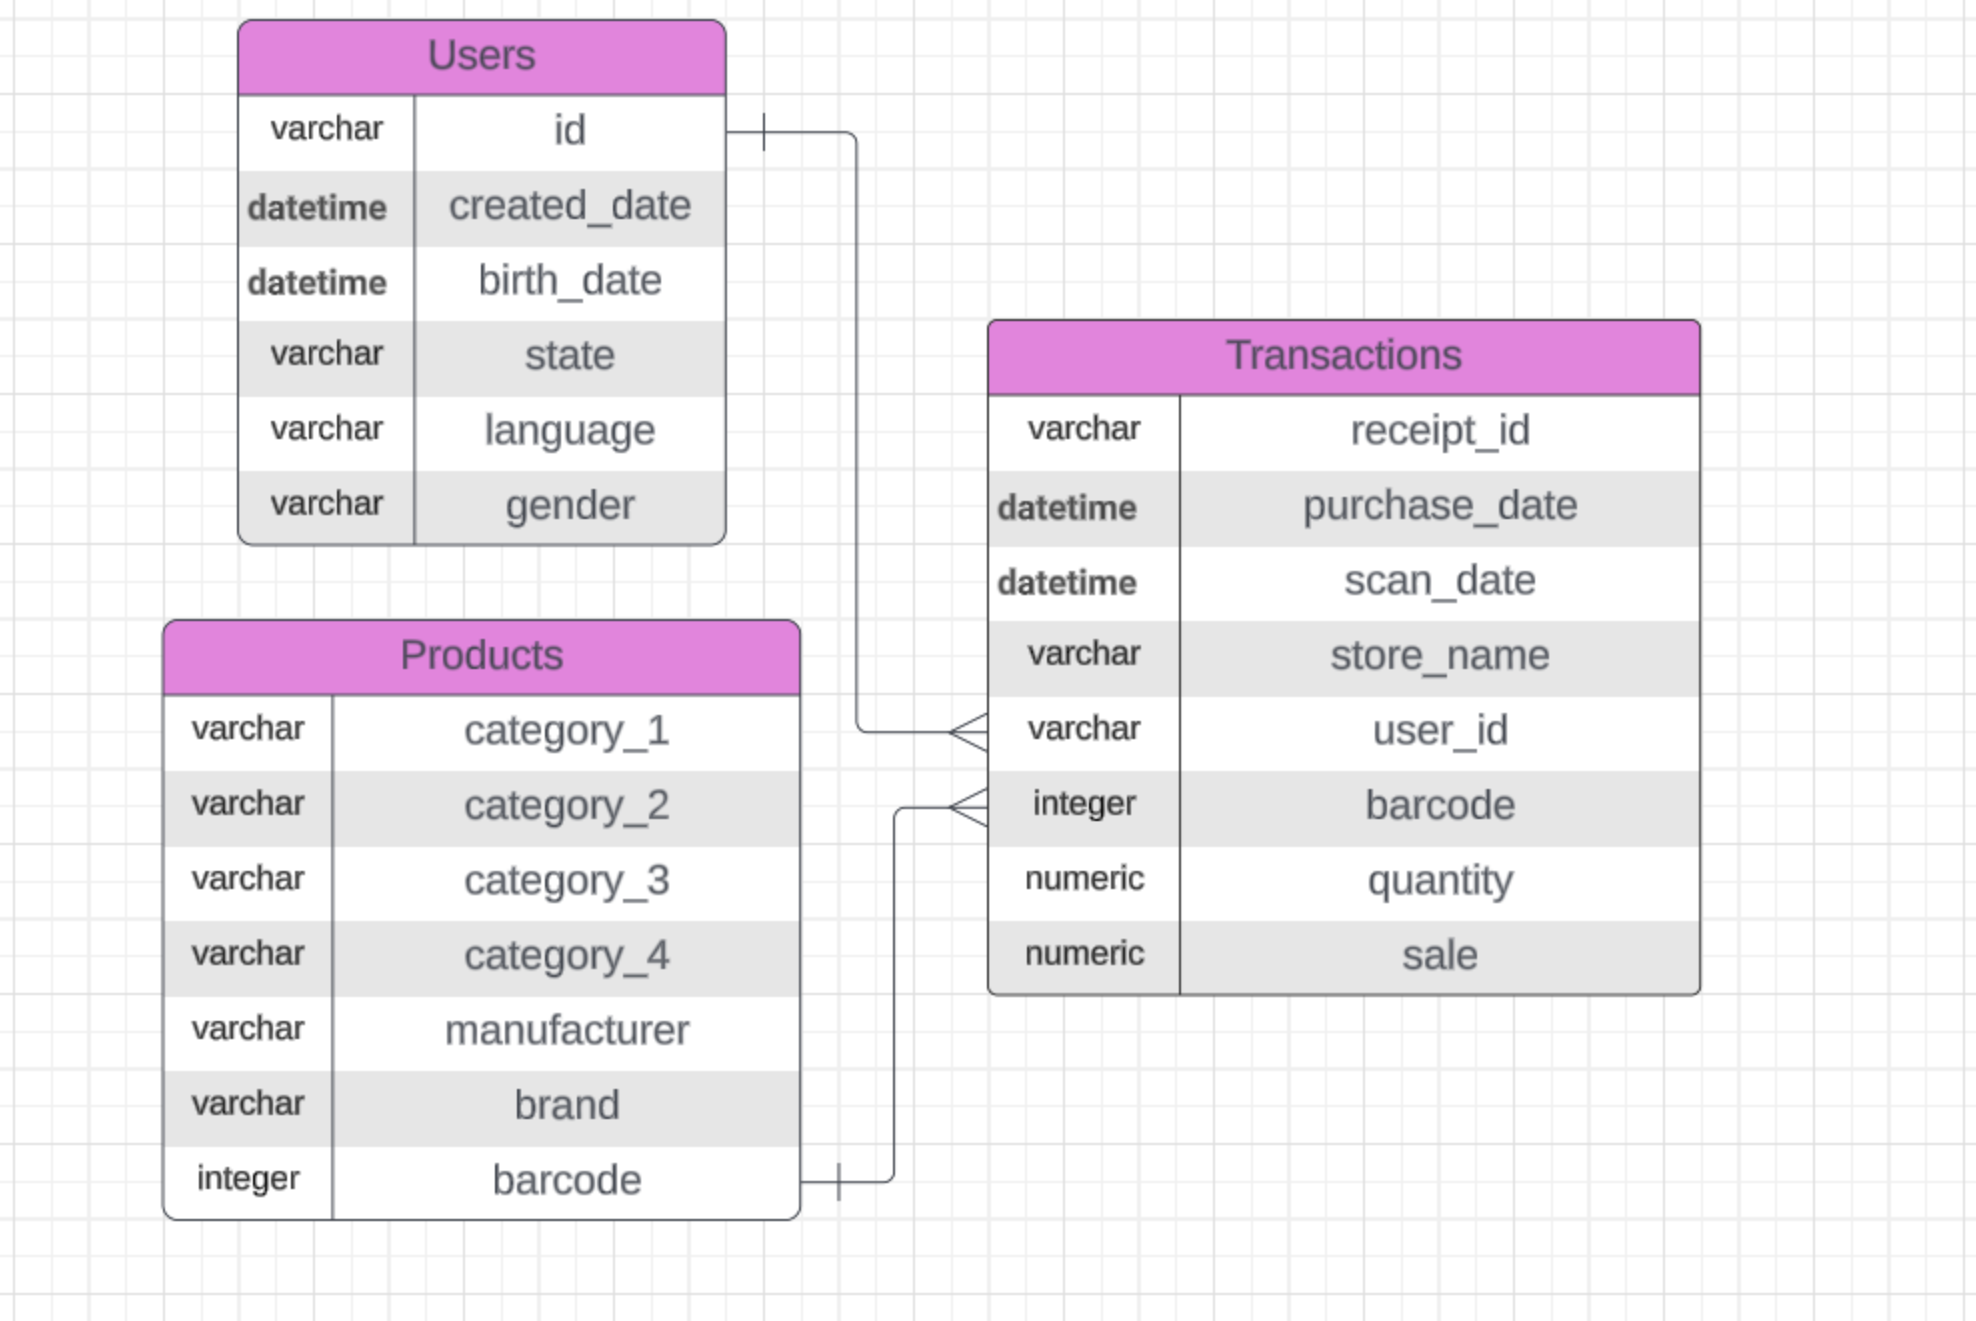

In [4]:
# show ER diagram

image_path = os.path.join(directory, 'er_diagram.png')
display(Image(filename=image_path))


## 2. EDA and answer the following questions:
1. Are there any data quality issues present?
2. Are there any fields that are challenging to understand?
3. other insights

### In EDA, we want to understand data quality

##### we can consider the following 5 points to get some general idea about the data
1. number of columns and rows, business meanings of the columns
2. column data types; do we convert some columns to link the table together?
3. missing values
4. outliers & data distribution
5. dulicates rows?

In [5]:
# duplicates, later need to remove

def check_duplicates(df):

    # get duplicates & perc
    duplicate_rows = df.duplicated().sum()
    duplicate_perc = (df.duplicated().sum() / len(df)) * 100

    # num of columns of df
    num_columns = len(df.columns)
    
    # output df
    df_duplicates = pd.DataFrame({
        'Value': [num_columns, len(df), duplicate_rows, duplicate_perc]
    }, index=['Total_cols', 'Total_rows', 'Duplicate_rows', 'Dulicate_percentage'])

    return df_duplicates.T


# missing values

def check_missing_value(df):
    
    # get missing values & perc
    missing_values = df.isnull().sum()
    missing_perc = (df.isnull().sum() / len(df)) * 100
    col_type = df.dtypes
    
    # generate df
    df_missing = pd.DataFrame({
        #'Column': missing_values.index,
        'Column_type': col_type ,
        'Missing_values': missing_values.values,
        'Percentage': missing_perc.values
    })
    
    return df_missing



####  User table EDA summary:
1. user table has 100000 users
2. we also have some missing value in 4 columns, especially LANGUAGE column (30.5% missing), might need attention
3. State column: 50 states + PR; and 4.8% missing value 
4. Language column: 2 Languages option 'es-419': Spanish & English, and 30.5% missing value
5. Gender column: 11 unique values include some missing value, 
    - 'prefer_not_to_say' & 'Prefer not to say' should be combined; 
    - 'non_binary' & 'Non-Binary' should be combined; 
    - "My gender isn't listed" & 'not_listed' should be combined; 
    - 'unknown' & 'not_specified' can be considered as the same； 
6. Minimum user creation date might be wrong, if this is app data, creation date is before the app launch
7. User birth_date have some outliers (less than 10 year old, or more than 100 year old, these are most likely outlier data)
8. For further analytics or date modeling, we might need to define what is a reasonalbe age range; or use other way to replace the outlier values, such as mean/median age.


In [6]:
# USER table:
user.head(2)
#user.info()

# duplicated rows 
print("User table's total rows & duplicated rows:")
check_duplicates(user)

# missing value and percentages
print("User table's missing values:")
check_missing_value(user)

# check categorical columns 
print(f"\nNo.of unique values in STATE:{user['STATE'].nunique()}; \nunique values are:{user['STATE'].unique()}")

print(f"\nNo.of unique values in LANGUAGE:{user['LANGUAGE'].nunique()}; \nunique values are:{user['LANGUAGE'].unique()}")

print(f"\nNo.of unique values in GENDER:{user['GENDER'].nunique()}; \nunique values are:{user['GENDER'].unique()}")



,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female


User table's total rows & duplicated rows:


,Total_cols,Total_rows,Duplicate_rows,Dulicate_percentage
Value,6.0,100000.0,0.0,0.0


User table's missing values:


,Column_type,Missing_values,Percentage
ID,object,0,0.000
CREATED_DATE,object,0,0.000
BIRTH_DATE,object,3675,3.675
STATE,object,4812,4.812
LANGUAGE,object,30508,30.508
GENDER,object,5892,5.892



No.of unique values in STATE:52; 
unique values are:['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']

No.of unique values in LANGUAGE:2; 
unique values are:['es-419' 'en' nan]

No.of unique values in GENDER:11; 
unique values are:['female' nan 'male' 'non_binary' 'transgender' 'prefer_not_to_say'
 'not_listed' 'Non-Binary' 'unknown' 'not_specified'
 "My gender isn't listed" 'Prefer not to say']


##### User table: we have user created_date and birth_date, let'e check if these data make sense 

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='subscription_days', ylabel='Count'>

Text(0.5, 1.0, 'Subscription Days Distribution')

Text(0.5, 0, 'Subscription Days')

Text(0, 0.5, 'Users')

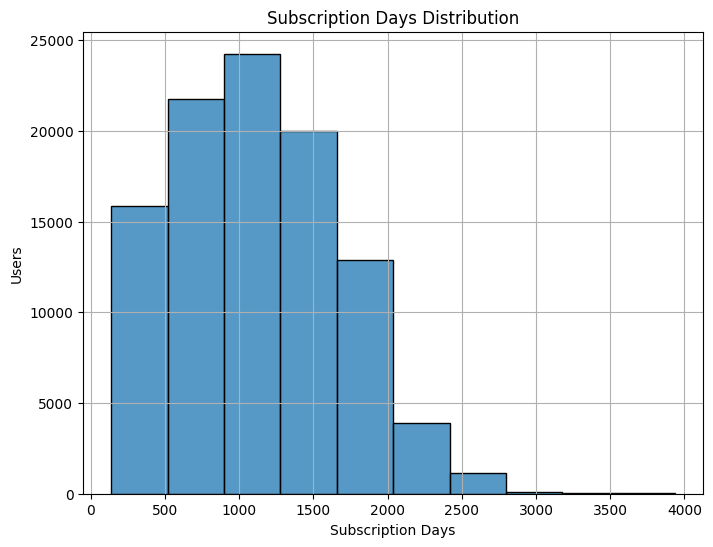

In [7]:
# 1. need remove timezone... to do the age calculation
user['CREATED_DATE'] = pd.to_datetime(user['CREATED_DATE']).dt.tz_localize(None)
today = datetime.today()
user['subscription_days'] = (today - user['CREATED_DATE']).dt.days

# 2. drop rows with missing created_date
sub_df = user.dropna(subset=['subscription_days'])
sub_df['subscription_days'] = sub_df['subscription_days'].round().astype(int)

# 3. Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(sub_df['subscription_days'], bins=10) 
plt.title('Subscription Days Distribution')
plt.xlabel('Subscription Days')
plt.ylabel('Users')
plt.grid(True)
plt.show()


C:\Users\szhang\AppData\Local\Temp\ipykernel_58256\1135405299.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['age'] = age_df['age'].round().astype(int)


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

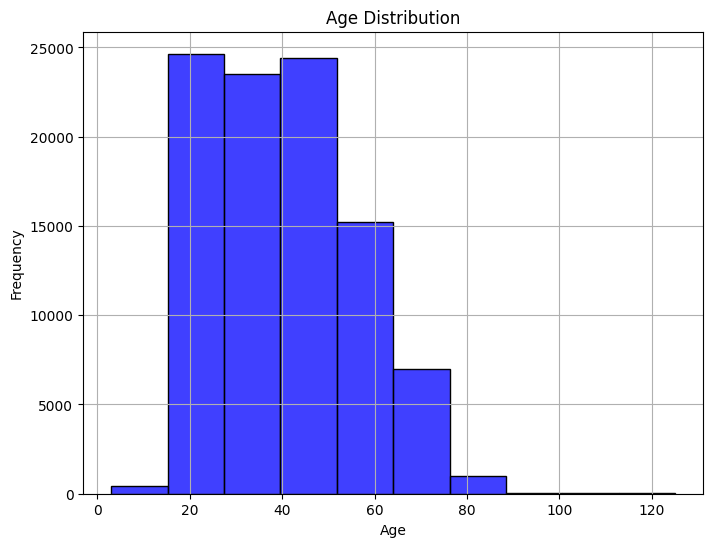

In [8]:
# need remove timezone... to do the age calculation
user['BIRTH_DATE'] = pd.to_datetime(user['BIRTH_DATE']).dt.tz_localize(None)
today = datetime.today()
user['age'] = (today - user['BIRTH_DATE']).dt.days / 365

age_df = user.dropna(subset=['age'])
age_df['age'] = age_df['age'].round().astype(int)

# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(age_df['age'], bins=10, color='blue') 
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
print(f"\nMinimum user creation date is: {user['CREATED_DATE'].min()}, which might not be true if this is app data, the company funded in 2013, but the app launched in 2017 (according to search results)\n")
print(f"\nMaximum user creation date is: {user['CREATED_DATE'].max()}\n")

print(f"\nMinimum user birth date is: {user['BIRTH_DATE'].min()}, which seems wrong or customer just selected the random date\n")
print(f"\nMaximum user birth date is: {user['BIRTH_DATE'].max()}, which also seems wrong, since an app user shouldn't be just 2 or 3 year old\n")



Minimum user creation date is: 2014-04-18 23:14:55, which might not be true if this is app data, the company funded in 2013, but the app launched in 2017 (according to search results)


Maximum user creation date is: 2024-09-11 17:59:15


Minimum user birth date is: 1900-01-01 00:00:00, which seems wrong or customer just selected the random date


Maximum user birth date is: 2022-04-03 07:00:00, which also seems wrong, since an app user shouldn't be just 2 or 3 year old



#### Product table EDA summary:

<span style="font-weight: bold;"> Potential Naming issues:</span> 

1. 'Health & Wellness' and 'Beauty' might overlap?
    - under 'Health & Wellness', CATEGORY_2 has 'Skin Care'; 
    - check by: product[product['CATEGORY_2'] == 'Skin Care']
    - 'Beauty' only has 2 rows, maybe move it to 'Health & Wellness' category?
4. 'Meat & Seafood' and 'Frozen' could also overlap, since in CATEGORY_2 has 'Frozen Meat', maybe change to 'Fresh Meat & Seafood'
    - check by: product[product['CATEGORY_1'] == 'Frozen'].CATEGORY_2.unique()
5.  'Alcohol' and 'Beverages' might overlap, suggest change 'Beverages' in CATEGORY_1 to 'Non-alcoholic beverages' to clarify ambiguity

<span style="font-weight: bold;"> Duplicated rows:</span> 
1. There are 215 duplicated rows, should be removed for accurate analysis

<span style="font-weight: bold;"> Column summary:</span> 

Column CATEGORY_1: 
1. 27 unique values including missing value with some data quality issue
2. 'Needs Review': need re-enter the values
3. 60.6% of products are in Health & Wellness category, while 38.4% products are in Snack category. these add up to 99% of all products
4. ther are few categories have less than 20 rows of records

Column CATEGORY_2 is the subcategory of CATEGORY_1:
1. 121 unique values including small amount of missing value

Column CATEGORY_3 is the subcategory of CATEGORY_2:
1. 344 unique values including small amount of missing value
2. 7.2% data missing

Column CATEGORY_4 is the subcategory of CATEGORY_3:
1. 92% of the data missing, which suggests it may not be useful or needs further investigation

MANUFACTURER
1. 4354 unique manufacturer
2. 26.8% missing value 

BRAND
1. 8122 unique brands
2. 26.8% missing value 

In [10]:
# Product table 
product.head(2)
#product.info()

print("Product table's total rows & duplicated rows:")
check_duplicates(product)

print("Product table's missing values:")
check_missing_value(product)

# check categorical columns 
print(f"\nNo.of unique values in CATEGORY_1:{product['CATEGORY_1'].nunique()}; \nunique values are:{product['CATEGORY_1'].unique()}")

print(f"\nNo.of unique values in CATEGORY_2:{product['CATEGORY_2'].nunique()}; \nunique values are:{product['CATEGORY_2'].unique()}")

print(f"\nNo.of unique values in CATEGORY_3:{product['CATEGORY_3'].nunique()}; \nunique values are:{product['CATEGORY_3'].unique()}")

print(f"\nNo.of unique values in CATEGORY_4:{product['CATEGORY_4'].nunique()}; \nunique values are:{product['CATEGORY_4'].unique()}")

print(f"\nNo.of unique values in MANUFACTURER:{product['MANUFACTURER'].nunique()}; \nunique values are:{product['MANUFACTURER'].unique()}")

print(f"\nNo.of unique values in BRAND:{product['BRAND'].nunique()}; \nunique values are:{product['BRAND'].unique()}")


,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10


Product table's total rows & duplicated rows:


,Total_cols,Total_rows,Duplicate_rows,Dulicate_percentage
Value,7.0,845552.0,215.0,0.025427


Product table's missing values:


,Column_type,Missing_values,Percentage
CATEGORY_1,object,111,0.013128
CATEGORY_2,object,1424,0.168411
CATEGORY_3,object,60566,7.162895
CATEGORY_4,object,778093,92.021898
MANUFACTURER,object,226474,26.784160
BRAND,object,226472,26.783923
BARCODE,float64,4025,0.476020



No.of unique values in CATEGORY_1:27; 
unique values are:['Health & Wellness' 'Snacks' 'Beverages' 'Pantry' 'Alcohol'
 'Apparel & Accessories' 'Restaurant' 'Needs Review' 'Dairy'
 'Home & Garden' nan 'Household Supplies' 'Meat & Seafood' 'Deli & Bakery'
 'Sporting Goods' 'Produce' 'Office & School' 'Frozen'
 'Arts & Entertainment' 'Animals & Pet Supplies' 'Electronics' 'Beauty'
 'Toys & Games' 'Mature' 'Vehicles & Parts' 'Baby & Toddler'
 'Luggage & Bags' 'Media']

No.of unique values in CATEGORY_2:121; 
unique values are:['Sexual Health' 'Puffed Snacks' 'Hair Care' 'Oral Care'
 'Medicines & Treatments' 'Deodorant & Antiperspirant' 'Snack Bars' nan
 'Bath & Body' 'Nuts & Seeds' 'Candy' 'Cookies' 'Variety Snack Packs'
 'Hair Removal' 'Medical Supplies & Equipment' 'Chips' 'Snack Cakes'
 'Skin Care' 'Dessert Toppings' 'Eye Care' 'Fruit & Vegetable Snacks'
 'Snack Mixes' 'Crackers' 'Jerky & Dried Meat'
 'Topical Muscle & Joint Relief Treatments' 'Foot Care' 'First Aid'
 'Ear Care' 'Menst

In [11]:
# Category_1 overview: 
category1_count = product.groupby('CATEGORY_1').size().reset_index(name='Count')
category1_count['Percentage'] = category1_count.Count/len(product)*100
category1_count.sort_values(by='Count', ascending=False)


,CATEGORY_1,Count,Percentage
11,Health & Wellness,512695,60.634355
23,Snacks,324817,38.414787
6,Beverages,3990,0.471881
20,Pantry,871,0.103010
2,Apparel & Accessories,846,0.100053
7,Dairy,602,0.071196
18,Needs Review,547,0.064691
0,Alcohol,503,0.059488
12,Home & Garden,115,0.013601
22,Restaurant,69,0.008160


In [12]:
#product[product['CATEGORY_2'] == 'Dips & Salsa'].CATEGORY_3.unique()
#product[product['MANUFACTURER'].str.contains('COCA-COLA',na=False,case=False)==True]['BRAND'].unique()
#product[product['CATEGORY_1'].str.contains('COCA-COLA',na=False,case=False)==True]['BRAND'].unique()
#product[product['CATEGORY_1'] == 'Snacks'].groupby('CATEGORY_2').size()

#'Prepared Meals' & 'Packaged Meals & Sides'

#### Transaction table EDA summary:

<span style="font-weight: bold;"> Data summary </span> 

1. No. of unique receipts are: 24440. Since we have total 50000 rows, means each row in transcation table represent 1 product, 1 receipt_id couple have multiple rows.
3. No.of unique values in STORE_NAME:954
4. No.of unique values in USER_ID:17694, a lot less than user table 
5. No.of unique values in BARCODE:11027, has some missing value
6. Average date difference between  SCAN_DATE and PURCHASE_DATE is around 2 days, with the median value as 1 days.


<span style="font-weight: bold;"> Duplicated rows:</span> 
1. There are 171 duplicated rows, should be removed

<span style="font-weight: bold;"> Data issue:</span> 
1. Negative date difference:
   - when calculate the difference between SCAN_DATE & PURCHASE_DATE, we saw 94 rows with negative value, these might be error/wrong input number, since recipt scan date should not be earlier than purchase date.
   - should be investigated and corrected or removed.
2. FINAL_QUANTITY & FINAL_SALE columns
   - suppose to be numeric values, but contain 12500 rows (25% of the records) of 'zero' and ' '
   - which need to be converted, and handeling missing values
   - here I use avg value to fill the null value instead of deleting them since they are 25% of the data
3. Potential receipts quantity anomaly:
   - From the analysis, on average each receipt has ~ 2 items
   - only 278 out of 24440 receipts has more than 5 items, which might be an unusual case.
   - especially, our TOP 5 stores based on number of receipts are : WALMART, DOLLAR GENERAL STORE, ALDI, TARGET, KROGER; most of people will go shop more items in these stores, but in our database, our avg quantity shopped from this store is ~ 1 item. Which could be a potential anomaly
   - Further investigation is needed to understand why this average is so low.
| STORE_NAME              | num_receipts | avg_quantity |
|-------------------------|--------------|--------------|
| WALMART                 | 10347        | 1.052811     |
| DOLLAR GENERAL STORE    | 1360         | 1.084513     |
| ALDI                    | 1278         | 1.122785     |
| TARGET                  | 739          | 1.103917     |
| KROGER                  | 725          | 1.031815     |

4. Frequency in grocery shopping
   - but our data shows within June 2024 and Sep 2024, on average scanned receipts by user is around 1.4 which is a significant lower than expected
   - Most of people go to grocery shopping for 3-4 times a month, but our data shows much lower frequency
       * --> people might not remember to scan the receipts
       * --> there is no attracting deals and promotions during this period
       * --> user churn, users are less engaged with the app 


In [13]:
# Transaction table:
transaction.head(2)

print("Transaction table's total rows & duplicated rows:")
check_duplicates(transaction)

print("transaction table's missing values:")
check_missing_value(transaction)

print(f"\nNo. of unique receipts are: {transaction.RECEIPT_ID.nunique()}. "
f"\nSince we have total {len(transaction)} rows, means each row in transcation table represent 1 product, 1 receipt_id couple have multiple rows.\n")

print(f"\nNo.of unique values in STORE_NAME:{transaction['STORE_NAME'].nunique()}")

print(f"\nNo.of unique values in USER_ID:{transaction['USER_ID'].nunique()}")

print(f"\nNo.of unique values in BARCODE:{transaction['BARCODE'].nunique()}")


# according to ER diagram, transaction's FINAL_QUANTITY and FINAL_SALE should be numeric, let's figure out the current situation first 
print(f"\nNo.of unique values in FINAL_QUANTITY:{transaction['FINAL_QUANTITY'].nunique()}; \nunique values are:{transaction['FINAL_QUANTITY'].unique()}")
# has 'zero'value. replace with 0 and convert column to numeric values

print(f"\nNo.of unique values in FINAL_SALE:{transaction['FINAL_SALE'].nunique()}; \nunique values are:{transaction['FINAL_SALE'].unique()}")

# even it doesn't have missing value, but it has ' '
# which made the column to a categorical varible
# so we need replace '' with numeric value 
# since sale records should have some value, if we have the product price/cost, we can add them up, but here we dont have the price/cost info, we can use average value to fill missing value 

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49


Transaction table's total rows & duplicated rows:


,Total_cols,Total_rows,Duplicate_rows,Dulicate_percentage
Value,8.0,50000.0,171.0,0.342


transaction table's missing values:


,Column_type,Missing_values,Percentage
RECEIPT_ID,object,0,0.000
PURCHASE_DATE,object,0,0.000
SCAN_DATE,object,0,0.000
STORE_NAME,object,0,0.000
USER_ID,object,0,0.000
BARCODE,float64,5762,11.524
FINAL_QUANTITY,object,0,0.000
FINAL_SALE,object,0,0.000



No. of unique receipts are: 24440. 
Since we have total 50000 rows, means each row in transcation table represent 1 product, 1 receipt_id couple have multiple rows.


No.of unique values in STORE_NAME:954

No.of unique values in USER_ID:17694

No.of unique values in BARCODE:11027

No.of unique values in FINAL_QUANTITY:87; 
unique values are:['1.00' 'zero' '2.00' '3.00' '4.00' '4.55' '2.83' '2.34' '0.46' '7.00'
 '18.00' '12.00' '5.00' '2.17' '0.23' '8.00' '1.35' '0.09' '2.58' '1.47'
 '16.00' '0.62' '1.24' '1.40' '0.51' '0.53' '1.69' '6.00' '2.39' '2.60'
 '10.00' '0.86' '1.54' '1.88' '2.93' '1.28' '0.65' '2.89' '1.44' '2.75'
 '1.81' '276.00' '0.87' '2.10' '3.33' '2.54' '2.20' '1.93' '1.34' '1.13'
 '2.19' '0.83' '2.61' '0.28' '1.50' '0.97' '0.24' '1.18' '6.22' '1.22'
 '1.23' '2.57' '1.07' '2.11' '0.48' '9.00' '3.11' '1.08' '5.53' '1.89'
 '0.01' '2.18' '1.99' '0.04' '2.25' '1.37' '3.02' '0.35' '0.99' '1.80'
 '3.24' '0.94' '2.04' '3.69' '0.70' '2.52' '2.27']

No.of unique values in FINAL_S

In [14]:
# check on numeric variables
transaction[transaction['FINAL_QUANTITY']=='zero'].head() # 12500 rows, not small amount, so we will fillna with average value
transaction[transaction['FINAL_SALE']==' '].head() # 12500 rows, not small amount, so we will fillna with average value


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,


In [15]:

# 1. convert quantity column to numeric
transaction['FINAL_QUANTITY'] = pd.to_numeric(transaction['FINAL_QUANTITY'], errors='coerce')
# 2. fill na with average value
avg_quantity =transaction['FINAL_QUANTITY'].mean()
transaction['FINAL_QUANTITY'] = transaction['FINAL_QUANTITY'].fillna(avg_quantity)


# 3. group by receipt_id to get total quantity on each receipt
quantity_df = pd.DataFrame(transaction.groupby('RECEIPT_ID')['FINAL_QUANTITY'].sum()).reset_index()
quantity_df['FINAL_QUANTITY'].describe()


count    24440.000000
mean         2.221568
std          3.603398
min          0.180000
25%          2.000000
50%          2.085902
75%          2.085902
max        552.000000
Name: FINAL_QUANTITY, dtype: float64

In [16]:
# 1. convert sales column to numeric
transaction['FINAL_SALE'] = pd.to_numeric(transaction['FINAL_SALE'], errors='coerce')
# 2. fill na with average value
avg_sales =transaction['FINAL_SALE'].mean()
transaction['FINAL_SALE'] = transaction['FINAL_SALE'].fillna(avg_sales)


# 3. group by receipt_id to get total quantity on each receipt
sales_df = pd.DataFrame(transaction.groupby('RECEIPT_ID')['FINAL_SALE'].sum()).reset_index()
sales_df['FINAL_SALE'].describe()


count    24440.000000
mean         9.362488
std         10.825780
min          0.000000
25%          5.576384
50%          7.366384
75%         10.216384
max        925.640000
Name: FINAL_SALE, dtype: float64

In [17]:
# check popular store and avg final quantity 
store_df = transaction.groupby('STORE_NAME').agg(
    num_receipts=('RECEIPT_ID', 'nunique'),  #  unique RECEIPT_IDs
    avg_quantity=('FINAL_QUANTITY', 'mean')  #   average  FINAL_QUANTITY
).reset_index()

store_df.sort_values(by='num_receipts', ascending=False)

,STORE_NAME,num_receipts,avg_quantity
915,WALMART,10347,1.052811
215,DOLLAR GENERAL STORE,1360,1.084513
21,ALDI,1278,1.122785
834,TARGET,739,1.103917
460,KROGER,725,1.031815
...,...,...,...
22,ALLSUP'S,1,1.042951
23,ALOHA FROM BLIND VENDORS,1,1.000000
24,ALOME CINEMA GRILL,1,1.042951
25,ALPINE MARKETPLACE,1,1.042951


In [18]:
# check by user, how many receipts and avg quantity
user_receripts_df = transaction.groupby('USER_ID').agg(
    num_receipts=('RECEIPT_ID', 'nunique'), 
    avg_quantity=('FINAL_QUANTITY', 'mean')  # average of FINAL_QUANTITY
).reset_index()

user_receripts_df.num_receipts.describe()
user_receripts_df.avg_quantity.describe()

count    17694.000000
mean         1.381259
std          0.715036
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: num_receipts, dtype: float64

count    17694.000000
mean         1.082068
std          1.074012
min          0.090000
25%          1.000000
50%          1.021476
75%          1.042951
max        138.521476
Name: avg_quantity, dtype: float64

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='purchase_days', ylabel='Count'>

Text(0.5, 1.0, 'Purchase_days Distribution (today - purchase date)')

Text(0.5, 0, 'purchase_days')

Text(0, 0.5, 'Frequency')

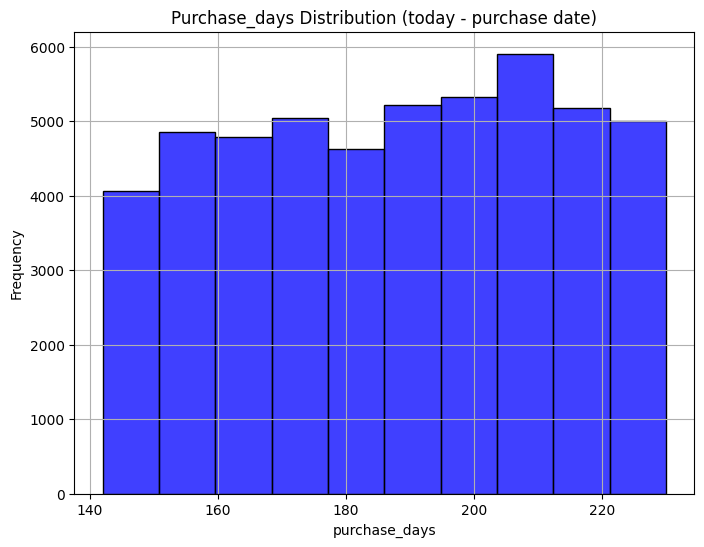

In [19]:
# check receipts' date variables
transaction['PURCHASE_DATE'] = pd.to_datetime(transaction['PURCHASE_DATE'])
today = datetime.today()
transaction['purchase_days'] = (today - transaction['PURCHASE_DATE']).dt.days

purchase_days_df = transaction.dropna(subset=['purchase_days'])
purchase_days_df['purchase_days'] = purchase_days_df['purchase_days'].round().astype(int)

# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_days_df['purchase_days'], bins=10, color='blue') 
plt.title('Purchase_days Distribution (today - purchase date)')
plt.xlabel('purchase_days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='scan_days', ylabel='Count'>

Text(0.5, 1.0, 'Scan_days Distribution (today - scan date)')

Text(0.5, 0, 'scan_days')

Text(0, 0.5, 'Frequency')

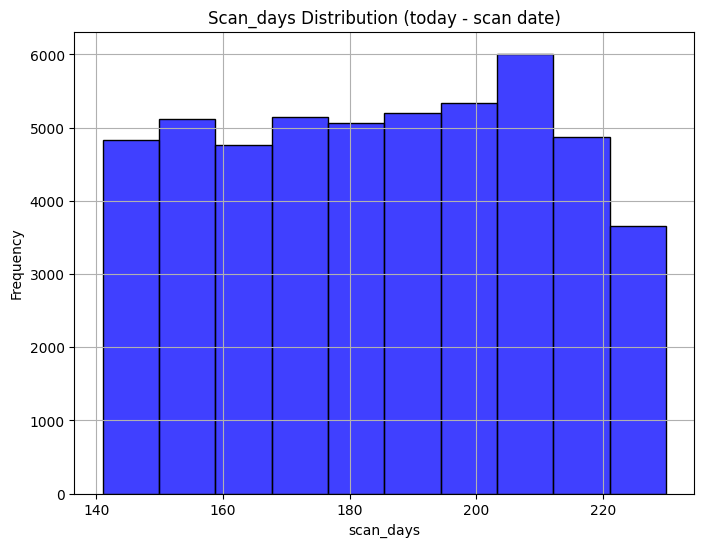

In [20]:
# fix timezone
transaction['SCAN_DATE'] = pd.to_datetime(transaction['SCAN_DATE']).dt.tz_localize(None)
today = datetime.today()
transaction['scan_days'] = (today - transaction['SCAN_DATE']).dt.days

scan_days_df = transaction.dropna(subset=['scan_days'])
scan_days_df['scan_days'] = scan_days_df['scan_days'].round().astype(int)

# Visualize age distribution
plt.figure(figsize=(8, 6))
sns.histplot(scan_days_df['scan_days'], bins=10, color='blue') 
plt.title('Scan_days Distribution (today - scan date)')
plt.xlabel('scan_days')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
transaction['days_waited_scan_receipt'] = transaction.purchase_days -transaction.scan_days
transaction['days_waited_scan_receipt'] .describe()

count    50000.000000
mean         2.569160
std          3.378758
min         -1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         33.000000
Name: days_waited_scan_receipt, dtype: float64

In [22]:
# check outliers
transaction[transaction['days_waited_scan_receipt']<0]

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,purchase_days,scan_days,days_waited_scan_receipt
455,04a320ed-2903-45e5-8fd7-6eaf08daef32,2024-06-29,2024-06-28 11:03:31.783,DOLLAR GENERAL STORE,62855f67708670299a658035,4.900002e+10,1.085902,6.000000,213,214,-1
675,06ce3da3-a588-4c37-93b4-0b6d11e42704,2024-06-22,2024-06-21 12:34:15.665,BIG LOTS,646f6ffb7a342372c858487e,3.111117e+11,1.085902,4.050000,220,221,-1
6561,430687e6-0bed-448a-8ed9-9a02327007a3,2024-07-06,2024-07-05 11:12:55.263,DOLLAR GENERAL STORE,5dcda161beba2b131519d18a,1.070002e+10,1.085902,1.000000,206,207,-1
8943,5c10e8df-9a9b-4ce0-bfed-51ab7adf2eb5,2024-07-06,2024-07-05 13:18:03.207,DOLLAR GENERAL STORE,6230b0508096d0349b6c86f7,8.087820e+10,1.085902,10.000000,206,207,-1
13685,8c42b6ad-696c-4057-955a-039129071bae,2024-07-09,2024-07-08 05:45:31.577,KROGER,5f5c0cdb34682e15e13cb8bc,1.111009e+10,1.085902,2.990000,203,204,-1
14691,95f130c0-4e8c-477b-a071-30df26955e79,2024-07-09,2024-07-08 12:04:49.210,KROGER,62d8828a1d76344f1a3611cc,1.111013e+10,1.085902,1.990000,203,204,-1
15169,9abbb4f5-ac03-465f-97a2-13158fdf4043,2024-06-16,2024-06-15 08:11:23.497,CVS,62fbe32f92710024ad021b5e,5.042833e+10,1.085902,5.990000,226,227,-1
15630,9f78650a-e7b5-4899-a126-fd872d7499f4,2024-06-15,2024-06-14 11:33:52.532,DOLLAR GENERAL STORE,614cb8a3d828044a0cc46575,2.840052e+10,1.000000,4.576384,227,228,-1
17121,af2b818f-4a92-4e98-958c-65f2ce0b271d,2024-06-15,2024-06-14 10:57:23.892,DOLLAR GENERAL STORE,64de6465516348066e7c5690,8.175130e+11,1.085902,3.830000,227,228,-1
19382,c6792a50-bcc2-4514-8cc1-686c4a994f8f,2024-06-29,2024-06-28 09:32:09.617,DOLLAR GENERAL STORE,64b0156ca13e1af42fda35e1,2.840031e+10,1.000000,4.576384,213,214,-1


#### user_product_transaction table EDA summary:

1. Time range in transaction table covers 88 days from 2024/6/12 - 2024/9/8
   - check by: transaction_clean.PURCHASE_DATE.max() - transaction_clean.PURCHASE_DATE.min()
      
<span style="color: red; font-weight: bold; text-decoration: underline;">Outstanding data issue</span> 

When join tables together, we can see that a lot of null values in columns from Users & Product table
1. USER_ID mapping 
   - 99.5% of USER_ID in transaction table are not found in User table
   - we can't get user age, or account creation dates, or their demographic features
   - This is POTENTIALLY due to our transcation table's date range is only 88 days
   - However, it is crucial that users in the transaction table should exist in the User table for proper data consistency
   - Recommended action:  
       - we should check the user table to make sure there is no data loss or other data pipeline issue
2. BARCODE mapping
   - 45.4% of BARCODE in transaction table are not found in Product table, which means will miss a lot of Brand/Category information
   - Potentially because product table is not up-to-date; it also has 'Needs Review' products
   - Recommended action:
       - check data pipeline
       - check 'Needs Review' products in product table


In [23]:
# delete duplicate rows and drop na rows
#transaction_clean = transaction.dropna()
transaction_clean = transaction.drop_duplicates()
product_clean = product.drop_duplicates()

# combine 3 tables
final_df = transaction_clean.merge(user, left_on ='USER_ID', right_on = 'ID', how ='left')

In [24]:
final_df[final_df.ID.notna()]
final_df.USER_ID.unique()
final_df.ID.nunique()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,purchase_days,scan_days,days_waited_scan_receipt,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,subscription_days,age
38,00729da3-2564-4616-a4ea-7426232d52e8,2024-08-30,2024-09-03 13:00:21.972,FAMILY DOLLAR,62e5a95ca6565cf0534c989c,3.400008e+10,1.000000,4.576384,151,147,4,62e5a95ca6565cf0534c989c,2022-07-30 21:57:48,1961-07-21 00:00:00,FL,en,female,912.0,63.567123
63,00ad12b5-a990-4f56-b7d8-78a506c36529,2024-08-18,2024-08-18 16:22:58.531,7-ELEVEN,610a8541ca1fab5b417b5d33,4.000000e+10,1.085902,2.390000,163,162,1,610a8541ca1fab5b417b5d33,2021-08-04 12:17:05,1977-01-12 00:00:00,NY,en,male,1273.0,48.076712
151,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,4.125009e+10,1.085902,2.490000,162,162,0,646bdaa67a342372c857b958,2023-05-22 21:12:06,1981-03-23 00:00:00,WI,en,female,616.0,43.882192
152,019520fd-f28b-42ff-a29e-d6bf4f5c4b7c,2024-08-19,2024-08-19 11:19:59.681,MEIJER,646bdaa67a342372c857b958,4.125022e+10,1.000000,4.576384,162,162,0,646bdaa67a342372c857b958,2023-05-22 21:12:06,1981-03-23 00:00:00,WI,en,female,616.0,43.882192
264,02c675f0-3d0c-49ae-aa18-9422bb9b1cda,2024-06-28,2024-06-28 09:59:19.953,PUBLIX,647281efa55bb77a0e26f586,7.203000e+10,1.000000,4.576384,214,214,0,647281efa55bb77a0e26f586,2023-05-27 22:19:27,1960-06-13 00:00:00,FL,en,male,611.0,64.671233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48030,d80f7f61-d98f-46d7-be8a-0969971e2b7c,2024-08-16,2024-08-17 08:55:14.932,HY-VEE,5e6d0beb01ecdd13986852e8,3.077211e+10,1.000000,8.970000,165,164,1,5e6d0beb01ecdd13986852e8,2020-03-14 16:53:00,1960-05-12 00:00:00,IA,en,male,1780.0,64.758904
48034,c50b8ee7-9e03-4f7c-9af1-73e367dbf2bb,2024-08-13,2024-08-13 13:37:15.212,ALDI,64dd9170516348066e7c4006,NaN,1.000000,1.290000,168,168,0,64dd9170516348066e7c4006,2023-08-17 03:18:08,1993-12-11 04:18:09,SC,en,female,530.0,31.153425
48536,47c724c5-680f-450d-a617-e36514fff06e,2024-07-18,2024-07-19 18:36:31.512,H-E-B,64ce5d823cb069b5eac9b700,4.122008e+10,1.000000,2.970000,194,192,2,64ce5d823cb069b5eac9b700,2023-08-05 14:32:34,1957-04-02 15:32:36,TX,en,male,541.0,67.868493
49172,fb6dfcb8-65a0-4024-9b4a-5091d0af3c72,2024-07-14,2024-07-14 21:11:46.253,LOTTE PLAZA MARKET,5fbd58f1ad6b5e12a114079a,2.540780e+10,1.000000,1.790000,198,197,1,5fbd58f1ad6b5e12a114079a,2020-11-24 19:03:13,1962-04-06 00:00:00,VA,en,male,1525.0,62.857534


array(['63b73a7f3d310dceeabd4758', '62c08877baa38d1a1f6c211a',
       '60842f207ac8b7729e472020', ..., '6254a7ea3f2afd3c2fd53d22',
       '5eb887f71699c213b1abe2e1', '62a0c8f7d966665570351bb8'],
      shape=(17694,), dtype=object)

91

In [25]:
print("final_df table's missing values:")
check_missing_value(final_df)

final_df table's missing values:


,Column_type,Missing_values,Percentage
RECEIPT_ID,object,0,0.000000
PURCHASE_DATE,datetime64[ns],0,0.000000
SCAN_DATE,datetime64[ns],0,0.000000
STORE_NAME,object,0,0.000000
USER_ID,object,0,0.000000
BARCODE,float64,5735,11.509362
FINAL_QUANTITY,float64,0,0.000000
FINAL_SALE,float64,0,0.000000
purchase_days,int64,0,0.000000
scan_days,int64,0,0.000000


### Are there any fields that are challenging to understand?
I guess no, column names are very clear to understand

## Second: SQL questions

#### Question 1: What are the top 5 brands by receipts scanned among users 21 and over?

In [26]:
# What are the top 5 brands by receipts scanned among users 21 and over?

q_1 = """
    with base as(
    select a.*
        , b.BRAND
        , c.age
    from transaction_clean a
    left join product_clean b ON a.BARCODE = b.BARCODE
    left join user c on a.USER_ID = c.ID
    where c.age >=21 and a.BARCODE is not null and b.BRAND <> 'None'
    )
    select BRAND
        , sum(FINAL_QUANTITY) as quantity
        , sum(FINAL_SALE) as sales 
        , count(distinct RECEIPT_ID) as num_receipts
    from base
    group by 1
    order by 4 desc , 3 desc
    ;
"""

question_1 = pd.DataFrame(psql.sqldf(q_1, locals()))
question_1

,BRAND,quantity,sales,num_receipts
0,DOVE,6.085902,52.032768,3
1,NERDS CANDY,6.257707,12.500000,3
2,TRIDENT,4.171805,46.720000,2
3,GREAT VALUE,4.085902,16.656384,2
4,SOUR PATCH KIDS,4.000000,16.592768,2
5,MEIJER,4.085902,15.246384,2
6,COCA-COLA,4.085902,14.096384,2
7,HERSHEY'S,4.085902,13.146384,2
8,CVS,2.000000,76.576384,1
9,COORS LIGHT,2.085902,34.960000,1


Question 1. top 5 brands by receipts scanned among users 21 and over:
    1. DOVE
    2. NERDS CANDY
    3. TRIDENT
    4. GREAT VALUE
    5. SOUR PATCH KIDS
| BRAND            | quantity  | sales      | num_receipts |
|------------------|-----------|------------|--------------|
| DOVE             | 6.085902 | 52.032768  | 3            |
| NERDS CANDY      | 6.257707 | 12.500000  | 3            |
| TRIDENT          | 4.171805 | 46.720000  | 2            |
| GREAT VALUE      | 4.085902 | 16.656384  | 2            |
| SOUR PATCH KIDS  | 4.000000 | 16.592768  | 2            |

Since there are same amount of number of receipts, order by number of receipts first and orde by sales again to get Top 5 brands.


#### Question 2: What are the top 5 brands by sales among users that have had their account for at least six months?

In [27]:
#What are the top 5 brands by sales among users that have had their account for at least six months?
# in pandasql, I have to use JULIANDAY function to get the date type converted , if in normal database, we can use datediff or direct substract should work.

q_2 = """
    with base as (
    select a.*
        , b.BRAND
        , c.CREATED_DATE
        , (JULIANDAY(DATE(a.PURCHASE_DATE)) - JULIANDAY(DATE(c.CREATED_DATE))) as user_days
    from transaction_clean a
    left join product_clean b ON a.BARCODE = b.BARCODE
    left join user c on a.USER_ID = c.ID
    where a.BARCODE is not null and b.BRAND <> 'None'
    )
    select BRAND
        , sum(FINAL_QUANTITY) as quantity
        , sum(FINAL_SALE) as sales 
        , count(distinct USER_ID) as num_users
    from base
    where user_days >= 180 
    group by 1
    order by 3 desc 

"""

question_2 = pd.DataFrame(psql.sqldf(q_2, locals()))
question_2

,BRAND,quantity,sales,num_users
0,CVS,2.000000,76.576384,1
1,DOVE,6.085902,52.032768,3
2,TRIDENT,4.171805,46.720000,1
3,COORS LIGHT,2.085902,34.960000,1
4,TRESEMMÉ,4.000000,19.156384,1
5,GREAT VALUE,4.085902,16.656384,2
6,SOUR PATCH KIDS,4.000000,16.592768,2
7,PEPPERIDGE FARM,2.000000,16.366384,1
8,AXE,2.085902,15.980000,1
9,MEIJER,4.085902,15.246384,2


Question 2. Top 5 brands by sales among users that have had their account for at least six months:
   1. CVS
   2. DOVE
   3. TRIDENT
   4. COORS LIGHT
   5. TRESEMMÉ" 

| BRAND        | quantity  | sales      | num_users |
|--------------|-----------|------------|-----------|
| CVS          | 2.000000  | 76.576384  | 1         |
| DOVE         | 6.085902  | 52.032768  | 3         |
| TRIDENT      | 4.171805  | 46.720000  | 1         |
| COORS LIGHT  | 2.085902  | 34.960000  | 1         |
| TRESEMMÉ     | 4.000000  | 19.156384  | 1         |

#### Question 3:  Who are Fetch’s power users?
##### for this question, my assumption of power user should be highly engaged with app but also have following characteristics:
1. high purchase frequency 
2. high sales amount and quantity
3. visit diverse stores
4. purchase includes diverse categories
5. App usage: short amount of date difference between purchase date and scan date

if we have other activity tracting data, analyze following aspects:
1. check redeemed points
2. use in-app logs, daily activition on app
3. promotion & deal finder
4. app feature engagement, for instance: link to online accounts etc.

We can discuss the detail metrics with the business holder, also we can suggest them by using statistical analysis such as: quantile analysis all features > 75%.
for instance: 
- have more than 4 items purchased (based on the 75th percentile of quantity)
- contribute to sales greater than 15.67 (the 75th percentile of sales)
- shop across 2+ stores
- engage with 1+ category & 1+ brand
- have shorter scan days < 2 days

In [28]:
# open ended question 1:
# Who are Fetch’s power users?

q_3 = """
    with base as(
    select a.*
        , b.BRAND
        , b.CATEGORY_1
        , c.age
    from transaction_clean a
    left join product_clean b ON a.BARCODE = b.BARCODE
    left join user c on a.USER_ID = c.ID
    )
    select  USER_ID
    , sum(FINAL_QUANTITY) as quantity
    , sum(FINAL_SALE) as sales
    , count(distinct RECEIPT_ID) as num_receipts
    , count(distinct STORE_NAME) as num_stores
    , count(distinct CATEGORY_1) as num_category
    , count(distinct BRAND) as num_brand
    , avg(days_waited_scan_receipt) as days_waited_scan_receipt
    from base 
    group by 1
    order by 3 desc
    ;
"""

# Run SQL query on the DataFrames
question_3 = pd.DataFrame(psql.sqldf(q_3, locals()))
question_3

,USER_ID,quantity,sales,num_receipts,num_stores,num_category,num_brand,days_waited_scan_receipt
0,630789e1101ae272a4852287,2.085902,925.640000,1,1,0,0,1.00
1,63af23db9f3fc9c7546fdbec,2.085902,476.340000,1,1,0,0,0.00
2,650874eafe41d365c2ee11d2,2.000000,271.866384,1,1,0,0,4.00
3,645add3bffe0d7e043ef1b63,8.000000,246.235536,4,2,0,0,2.00
4,637257e75fdbb03aa198a310,8.085902,207.869152,4,2,1,2,0.75
...,...,...,...,...,...,...,...,...
17689,5d8dc8adbc472511942afe7b,2.085902,0.000000,1,1,0,0,1.00
17690,5c71b1677a313070432ec25e,2.085902,0.000000,1,1,1,1,4.00
17691,5c453e15b244685b6b508dcd,2.085902,0.000000,1,1,0,0,0.00
17692,5b92fa6abd8890135b804898,2.085902,0.000000,1,1,0,0,1.00


In [29]:
question_3.describe()

,quantity,sales,num_receipts,num_stores,num_category,num_brand,days_waited_scan_receipt
count,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000,17694.000000
mean,3.059079,12.904689,1.381259,1.195151,0.613428,0.670284,2.585437
std,4.528580,14.259327,0.715036,0.458357,0.582718,0.685925,3.217195
min,0.180000,0.000000,1.000000,1.000000,0.000000,0.000000,-1.000000
25%,2.000000,6.066384,1.000000,1.000000,0.000000,0.000000,1.000000
50%,2.085902,9.066384,1.000000,1.000000,1.000000,1.000000,1.000000
75%,4.085902,15.672768,2.000000,1.000000,1.000000,1.000000,3.000000
max,554.085902,925.640000,10.000000,5.000000,3.000000,6.000000,32.000000


In [30]:
# The following users can be considered as power user, 
question_3[(question_3.quantity>4) & 
            (question_3.sales>15.7) & 
            (question_3.num_stores>2) &
            (question_3.num_receipts>1) & 
            (question_3.num_category>1) & 
            (question_3.num_brand>1) &
            (question_3.days_waited_scan_receipt< 2) ]

,USER_ID,quantity,sales,num_receipts,num_stores,num_category,num_brand,days_waited_scan_receipt
8,5e022fe1daccde120544eb42,6.257707,140.740000,3,3,2,2,0.666667
17,65d00704fe555d15f288ff6e,6.257707,113.420000,3,3,2,2,1.000000
22,63d8337b55e4cd39e5e17ede,6.085902,108.022768,3,3,2,2,0.333333
26,5f906764542e501679d188f4,11.257707,104.446384,4,3,2,4,1.000000
79,62535ab0fc0da6299a70f5ca,6.000000,74.189152,3,3,2,2,1.666667
184,666a2e417c0469953bfd9656,9.257707,58.156384,4,3,2,2,1.750000
218,61fda39dc6faa65c28c1f460,8.000000,55.165536,4,4,2,2,1.250000
224,63b2dd629f3fc9c754733112,8.000000,54.325536,4,3,2,2,0.750000
226,652eae3aa65d634c1c297f30,6.085902,54.212768,3,3,2,2,0.666667
227,6608ac7e828f877fdee8ed5b,8.085902,54.189152,4,3,2,3,1.500000


In [31]:

# Who are Fetch’s power users?
# sql rewrite after quantile analysis

q_3 = """
    with base as(
    select a.*
        , b.BRAND
        , b.CATEGORY_1
        , c.age
    from transaction_clean a
    left join product_clean b ON a.BARCODE = b.BARCODE
    left join user c on a.USER_ID = c.ID
    )
    select  USER_ID
    , sum(FINAL_QUANTITY) as quantity
    , sum(FINAL_SALE) as sales
    , count(distinct RECEIPT_ID) as num_receipts
    , count(distinct STORE_NAME) as num_stores
    , count(distinct CATEGORY_1) as num_category
    , count(distinct BRAND) as num_brand
    , avg(days_waited_scan_receipt) as days_waited_scan_receipt
    from base 
    group by 1
    having sum(FINAL_QUANTITY) >4
    and sum(FINAL_SALE)>15.7
    and count(distinct RECEIPT_ID) > 1
    and count(distinct STORE_NAME) >2
    and count(distinct CATEGORY_1) >1
    and count(distinct BRAND) >1
    and avg(days_waited_scan_receipt) < 2
    order by 3 desc
    ;
"""

# Run SQL query on the DataFrames
power_user = pd.DataFrame(psql.sqldf(q_3, locals()))
power_user
power_user.USER_ID.nunique()

,USER_ID,quantity,sales,num_receipts,num_stores,num_category,num_brand,days_waited_scan_receipt
0,5e022fe1daccde120544eb42,6.257707,140.740000,3,3,2,2,0.666667
1,65d00704fe555d15f288ff6e,6.257707,113.420000,3,3,2,2,1.000000
2,63d8337b55e4cd39e5e17ede,6.085902,108.022768,3,3,2,2,0.333333
3,5f906764542e501679d188f4,11.257707,104.446384,4,3,2,4,1.000000
4,62535ab0fc0da6299a70f5ca,6.000000,74.189152,3,3,2,2,1.666667
5,666a2e417c0469953bfd9656,9.257707,58.156384,4,3,2,2,1.750000
6,61fda39dc6faa65c28c1f460,8.000000,55.165536,4,4,2,2,1.250000
7,63b2dd629f3fc9c754733112,8.000000,54.325536,4,3,2,2,0.750000
8,652eae3aa65d634c1c297f30,6.085902,54.212768,3,3,2,2,0.666667
9,6608ac7e828f877fdee8ed5b,8.085902,54.189152,4,3,2,3,1.500000


60

#### Question 4: At what percent has Fetch grown year over year?


1.	Data time range: Jan - Aug from 2017 – 2024 due to incomplete data in 2024.
2.	2017 - 2018: rapid growth period after APP launch on average 330%+ each year; corresponds with the app launch
3.	2019 - 2020: high growth ~ 200% YoY; strong user acquisitions
4.	2021 - 2022: slower growth, compared to previous years, might be due to Covid, inflation etc. which potentially changed user behavior
5.	2023 - 2024: user growth slows down, negative growth; could be a results of external economy reasons, and competitor activations


- if look at post covid days after 2020, the growth trend is similar as GDP and opposes to inflation rate trends


Fetch user growth might related to: 
1. Promotion and marketing activity
2. Covid impact
3. External economy reason:
   - inflation
   - GDP
   - layoffs/low job opening in the market 
5. Competitor activities


reference: 
1. https://tradingeconomics.com/united-states/core-inflation-rate
2. https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=US

In [32]:
# At what percent has Fetch grown year over year?
# since our transation data only have 88 days from 2024, we can use USER table to analyze this question
# user creating date end in Sep 2024, so we analyze all years from Jan - Aug 
q_4 = """
with base as (
    select *,
           date(CREATED_DATE) as member_date
           , CAST(strftime('%Y', CREATED_DATE) as INTEGER) as member_year
           , CAST(strftime('%m', CREATED_DATE) as INTEGER) as member_month
    from user
    ),
    user_num AS (
        select member_year
               , count(distinct ID) as users
        from base
        where member_month <9
        group by member_year
    )
    select a.member_year
           , b.member_year as previous_year
           , a.users 
           , b.users as last_year_users
           , (a.users - b.users) user_diff
           , case when b.users = 0 then null
               when b.users is null then null 
               else ((a.users - b.users ) * 100.0) / b.users 
               end as yoy_user_growth
     from user_num a
     left join user_num b 
     where  a.member_year = b.member_year + 1

"""

# Run SQL query on the DataFrames
question_4 = pd.DataFrame(psql.sqldf(q_4, locals()))
question_4

,member_year,previous_year,users,last_year_users,user_diff,yoy_user_growth
0,2015,2014,36,21,15,71.428571
1,2016,2015,59,36,23,63.888889
2,2017,2016,258,59,199,337.288136
3,2018,2017,1109,258,851,329.844961
4,2019,2018,3590,1109,2481,223.715059
5,2020,2019,10103,3590,6513,181.420613
6,2021,2020,12979,10103,2876,28.466792
7,2022,2021,17718,12979,4739,36.512828
8,2023,2022,11335,17718,-6383,-36.025511
9,2024,2023,10652,11335,-683,-6.025584


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='previous_year', ylabel='yoy_user_growth'>

Text(0.5, 1.0, 'yoy_user_growth')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'YoY_growth')

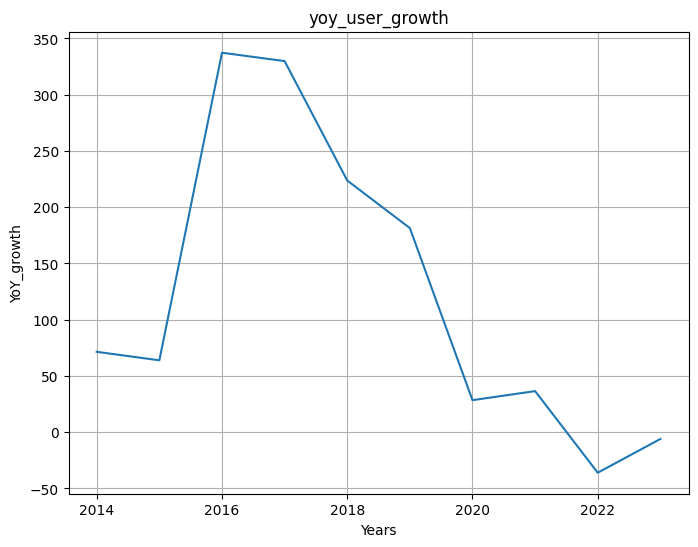

In [33]:
plt.figure(figsize=(8, 6))
sns.lineplot(question_4, x = question_4['previous_year'], y=question_4['yoy_user_growth'])
plt.title('yoy_user_growth')
plt.xlabel('Years')
plt.ylabel('YoY_growth')
plt.grid(True)
plt.show()

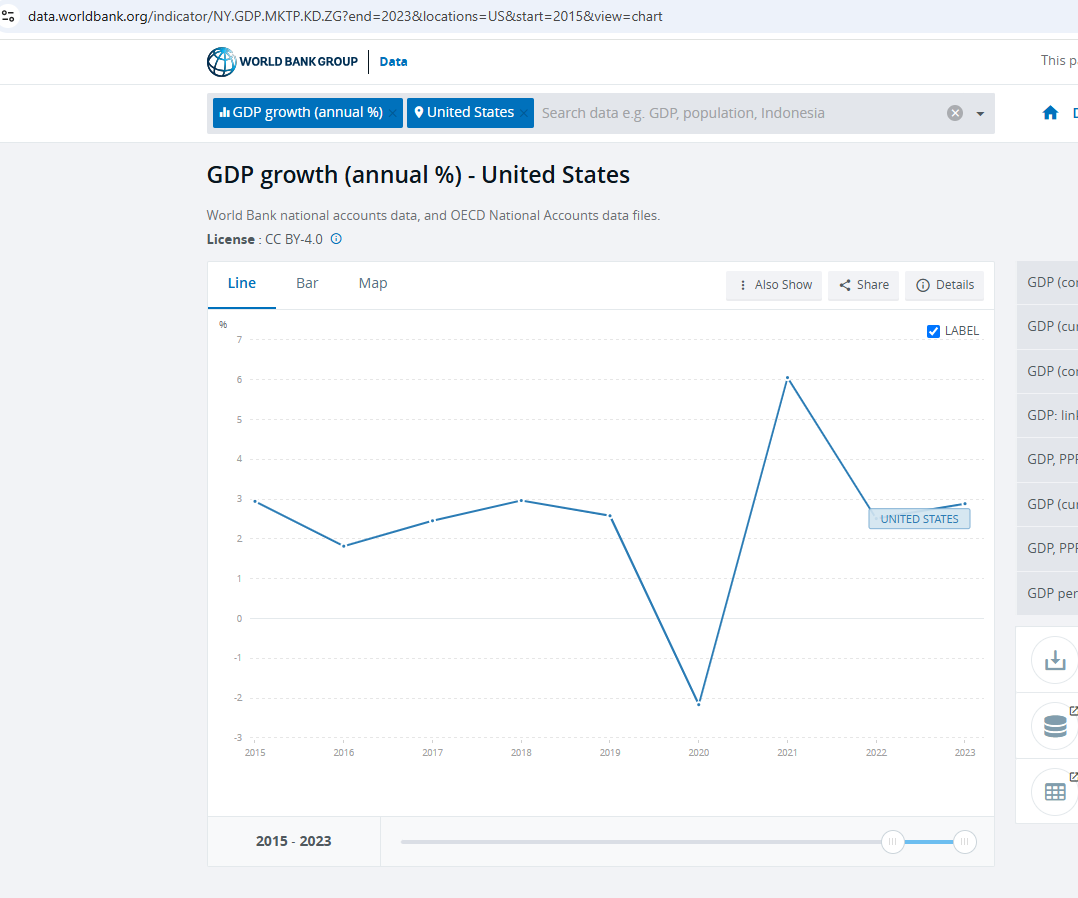

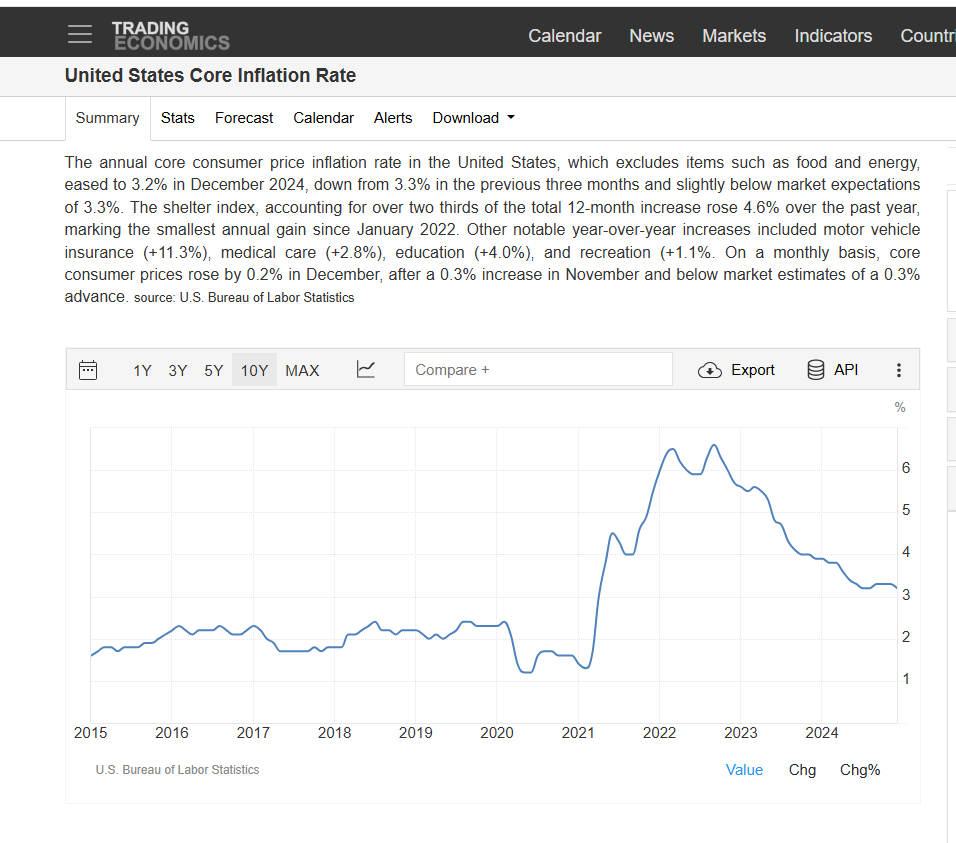

In [34]:
gdp = os.path.join(directory, 'GDP.png')
display(Image(filename=gdp))

Inflation = os.path.join(directory, 'Inflation.png')
display(Image(filename=Inflation))

In [35]:
# At what percent has Fetch grown year over year?
# since our transation data only have 88 days from 2024, we can use USER table to analyze this question
q_5 = """
with base as (
    select *,
           date(CREATED_DATE) as member_date
           , CAST(strftime('%Y', CREATED_DATE) as INTEGER) as member_year
           ,CAST(strftime('%m', CREATED_DATE) as INTEGER) as member_month
    from user
    ),
    user_num AS (
        select member_year
               , member_month
               , count(distinct ID) as users
        from base
        where member_month <=9
        group by member_year
        , member_month
    )
    select a.member_year
           , a.member_month
           , b.member_year as previous_year
           , b.member_month as previous_month
           , a.users 
           , b.users as last_year_users
           , (a.users - b.users ) as user_diff
           , case when b.users = 0 then null
               when b.users is null then null 
               else ((a.users - b.users ) * 100.0) / b.users 
               end as yoy_user_growth
     from user_num a
     left join user_num b 
     where a.member_month=b.member_month and a.member_year = b.member_year + 1
"""

# Run SQL query on the DataFrames
question_5 = pd.DataFrame(psql.sqldf(q_5, locals()))
question_5

,member_year,member_month,previous_year,previous_month,users,last_year_users,user_diff,yoy_user_growth
0,2015,4,2014,4,5,2,3,150.000000
1,2015,5,2014,5,4,13,-9,-69.230769
2,2015,7,2014,7,4,4,0,0.000000
3,2015,8,2014,8,4,2,2,100.000000
4,2015,9,2014,9,3,3,0,0.000000
...,...,...,...,...,...,...,...,...
81,2024,5,2023,5,1146,1209,-63,-5.210918
82,2024,6,2023,6,1260,1198,62,5.175292
83,2024,7,2023,7,2037,1276,761,59.639498
84,2024,8,2023,8,1807,1215,592,48.724280


<Figure size 800x600 with 0 Axes>

<Axes: xlabel='previous_year', ylabel='yoy_user_growth'>

Text(0.5, 1.0, 'yoy_user_growth')

Text(0.5, 0, 'Years')

Text(0, 0.5, 'YoY_growth')

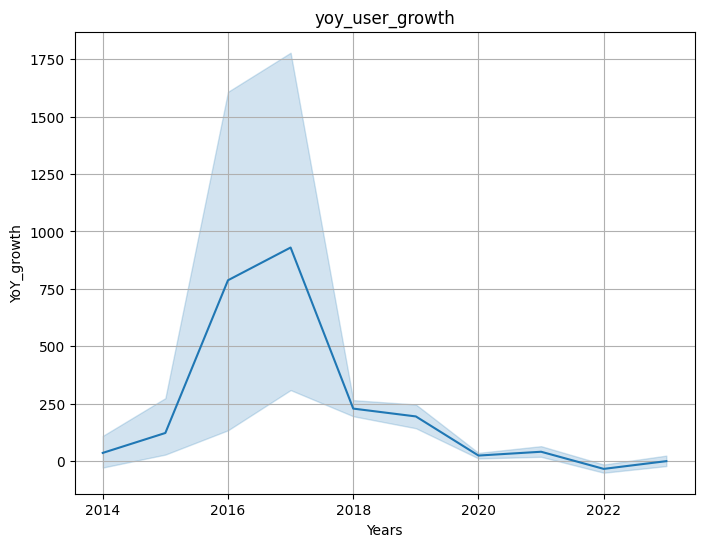

In [36]:
plt.figure(figsize=(8, 6))
sns.lineplot(question_5, x = question_5['previous_year'], y=question_5['yoy_user_growth'])
plt.title('yoy_user_growth')
plt.xlabel('Years')
plt.ylabel('YoY_growth')
plt.grid(True)
plt.show()
